<a href="https://colab.research.google.com/github/poddardelhi/Credit_modeller/blob/main/Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive #comment it out if you're importing the data locally
drive.mount('/content/drive') #comment it out if you're importing the data locally
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported.')

Mounted at /content/drive
Modules are imported.


# Data Loading

In [3]:
# Data Loading
df = pd.read_excel(io="/content/drive/MyDrive/Colab Notebooks/credit_risk_modeller/home-task-1-.xlsx",sheet_name="Applications_Decided_On")
df_predict = pd.read_excel(io="/content/drive/MyDrive/Colab Notebooks/credit_risk_modeller/home-task-1-.xlsx",sheet_name="New_Applications")


In [ ]:
df.head()

,Client_No,Monthly_Income,Years_Worked,Obligations,Got_Approval
0,1,969.961189,8.754713,YES,NO
1,2,955.062497,6.405082,NO,NO
2,3,1157.539444,1.436116,YES,NO
3,5,1330.892070,7.477707,YES,YES
4,7,1557.596072,14.442906,NO,YES


# Data Cleaning and Transformation

In [4]:
def check_data (df) -> pd.DataFrame:
  null_count= df.isnull().sum()
  nan_count = df.isna().sum()
  duplicates = df.duplicated(keep=False).value_counts(normalize= True)
  check_data_table = pd.concat([null_count, nan_count], axis=1, keys= ['null_count', 'nan_count'])
  return check_data_table

In [5]:
check_data(df)

,null_count,nan_count
Client_No,0,0
Monthly_Income,0,0
Years_Worked,0,0
Obligations,0,0
Got_Approval,0,0


In [6]:
df.duplicated(subset=['Client_No'],keep=False).value_counts(normalize= True) *100

False    100.0
dtype: float64

In [7]:
from pandas.io.formats.format import decimal
def format(df) -> pd.DataFrame:
  df_formatted = df.copy()
  df_formatted[['Monthly_Income','Years_Worked']] = df_formatted[['Monthly_Income','Years_Worked']].round(decimals=0)
  df_formatted['Obligations']= df_formatted['Obligations'].map({'YES':1, 'NO':0})
  if 'Got_Approval' in df_formatted.columns:
    df_formatted['Got_Approval']= df_formatted['Got_Approval'].map({'YES':1, 'NO':0})
  return df_formatted


In [8]:
df_formatted = format(df)

In [ ]:
df_formatted.head()

,Client_No,Monthly_Income,Years_Worked,Obligations,Got_Approval
0,1,970.0,9.0,1,0
1,2,955.0,6.0,0,0
2,3,1158.0,1.0,1,0
3,5,1331.0,7.0,1,1
4,7,1558.0,14.0,0,1


In [ ]:
df_formatted.describe()

,Client_No,Monthly_Income,Years_Worked,Obligations,Got_Approval
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1500.056000,1200.523500,8.042000,0.555500,0.457500
std,862.199081,296.479374,4.029684,0.497034,0.498315
min,1.000000,500.000000,1.000000,0.000000,0.000000
25%,755.750000,994.750000,5.000000,0.000000,0.000000
50%,1511.500000,1193.000000,8.000000,1.000000,0.000000
75%,2233.250000,1407.250000,12.000000,1.000000,1.000000
max,2997.000000,2220.000000,15.000000,1.000000,1.000000


# Feature Scaling and Model Builds

In [9]:
# Feature scaling and training data split
from sklearn.preprocessing import StandardScaler
df_training_data= df_formatted.drop(columns=['Client_No'])
scaler = StandardScaler()
X = df_training_data.drop(columns=['Got_Approval'])
Y = df_training_data['Got_Approval']
# Select only the numerical columns
numerical_cols = ['Monthly_Income', 'Years_Worked']

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Print the scaled feature variable of (X) and target variable (Y)
print ('Scaled feature variable (X) \n')
print(X.head())

print ("\n Target variable (Y)\n")
print (Y.head())

Scaled feature variable (X) 

   Monthly_Income  Years_Worked  Obligations
0       -0.777731      0.237795            1
1       -0.828337     -0.506866            0
2       -0.143464     -1.747969            1
3        0.440196     -0.258646            1
4        1.206040      1.478898            0

 Target variable (Y)

0    0
1    0
2    0
3    1
4    1
Name: Got_Approval, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 110)

## Logistic Regression

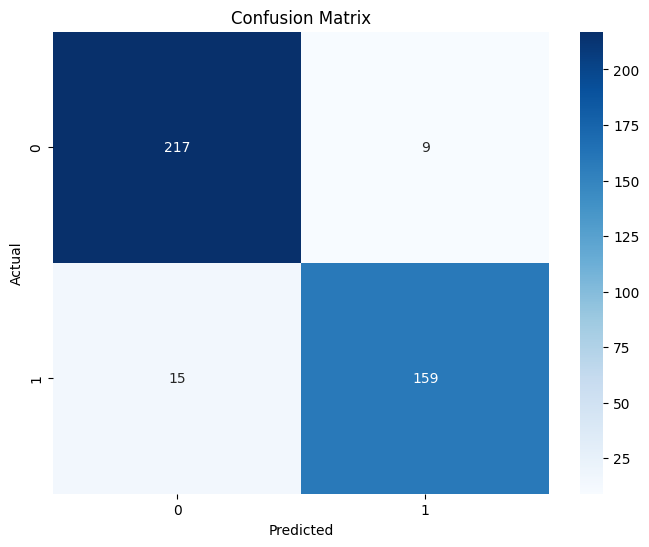

Accuracy: 0.94
Precision: 0.9401662561576355
Recall: 0.94
F1 Score: 0.939866697310963
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       226
           1       0.95      0.91      0.93       174

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logistic_reg = LogisticRegression(random_state=110)

# Train the logistic regression model
logistic_reg.fit(X_train, Y_train)

# Predit on the test set
Y_predict = logistic_reg.predict (X_test)

# Calculate the accuracy
accuracy = accuracy_score (Y_test, Y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, Y_predict, average='weighted')
recall = recall_score(Y_test, Y_predict, average='weighted')
f1 = f1_score(Y_test, Y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(Y_test, Y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


## Decision Tree Classifier

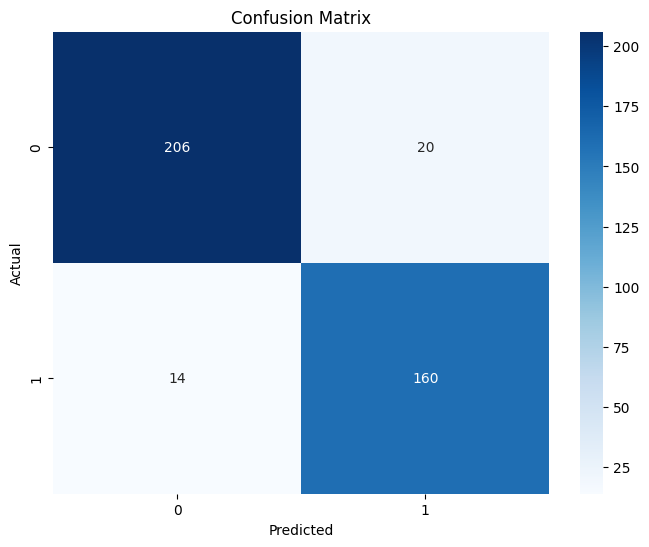

Accuracy: 0.915
Precision: 0.9157121212121211
Recall: 0.915
F1 Score: 0.9151485901041271
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       226
           1       0.89      0.92      0.90       174

    accuracy                           0.92       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.92      0.92      0.92       400



In [12]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

decision_tree =  DecisionTreeClassifier(random_state=110)

# Train the Decision Tree Classifier model
decision_tree.fit(X_train, Y_train)

# Predit on the test set
Y_predict = decision_tree.predict (X_test)

# Calculate the accuracy
accuracy = accuracy_score (Y_test, Y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, Y_predict, average='weighted')
recall = recall_score(Y_test, Y_predict, average='weighted')
f1 = f1_score(Y_test, Y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(Y_test, Y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## Random Forest Classifier

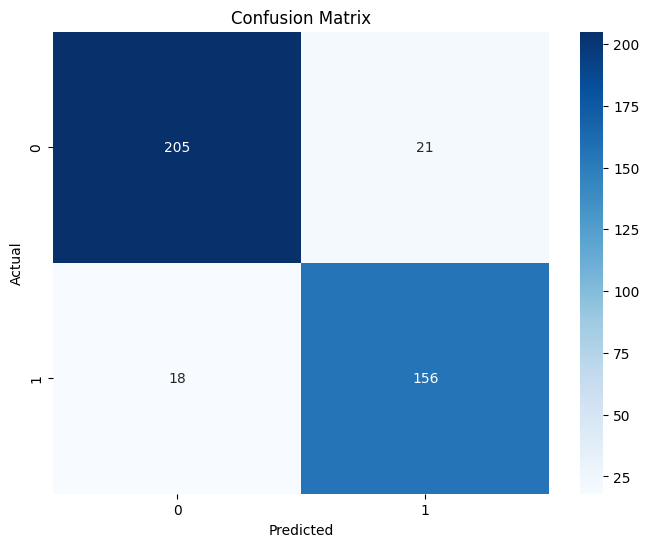

Accuracy: 0.9025
Precision: 0.9027844493425553
Recall: 0.9025
F1 Score: 0.9025909428359317
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       226
           1       0.88      0.90      0.89       174

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

random_forest =  RandomForestClassifier(random_state=110)

# Train the Random Forest Classifier
random_forest.fit(X_train, Y_train)

# Predit on the test set
Y_predict = random_forest.predict (X_test)

# Calculate the accuracy
accuracy = accuracy_score (Y_test, Y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, Y_predict, average='weighted')
recall = recall_score(Y_test, Y_predict, average='weighted')
f1 = f1_score(Y_test, Y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(Y_test, Y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## Support Vector Classifier

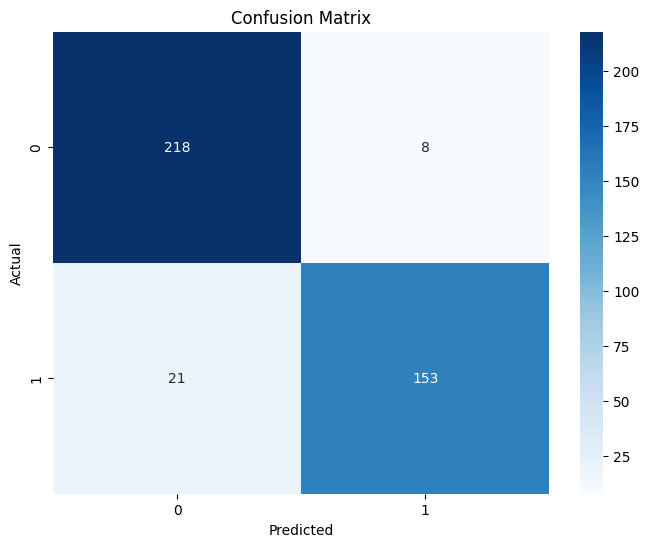

Accuracy: 0.9275
Precision: 0.9287407417032668
Recall: 0.9275
F1 Score: 0.9271067244423046
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       226
           1       0.95      0.88      0.91       174

    accuracy                           0.93       400
   macro avg       0.93      0.92      0.93       400
weighted avg       0.93      0.93      0.93       400



In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

svm_classifier = SVC(random_state=110)

# Train on Support Vector Classifier
svm_classifier.fit(X_train, Y_train)

# Predit on the test set
Y_predict = svm_classifier.predict (X_test)

# Calculate the accuracy
accuracy = accuracy_score (Y_test, Y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, Y_predict, average='weighted')
recall = recall_score(Y_test, Y_predict, average='weighted')
f1 = f1_score(Y_test, Y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(Y_test, Y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## KNN Classifier

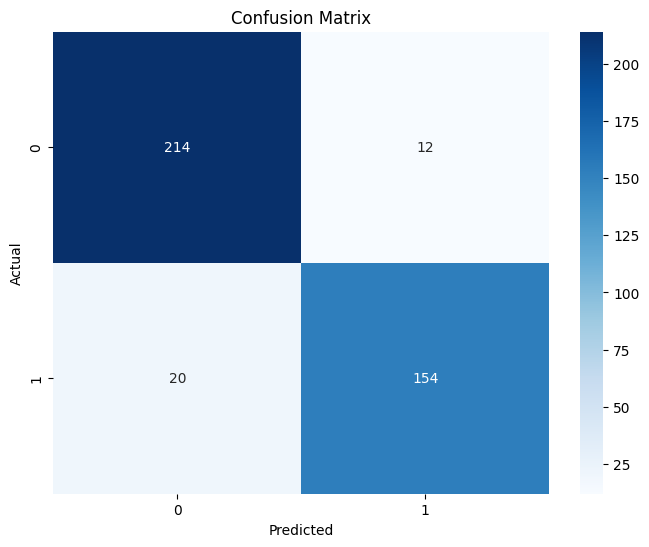

Accuracy: 0.92
Precision: 0.9202636185768717
Recall: 0.92
F1 Score: 0.9197544757033248
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       226
           1       0.93      0.89      0.91       174

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(X_train, Y_train)

# Predit on the test set
Y_predict = knn_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score (Y_test, Y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, Y_predict, average='weighted')
recall = recall_score(Y_test, Y_predict, average='weighted')
f1 = f1_score(Y_test, Y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(Y_test, Y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## XGBoost Classifier

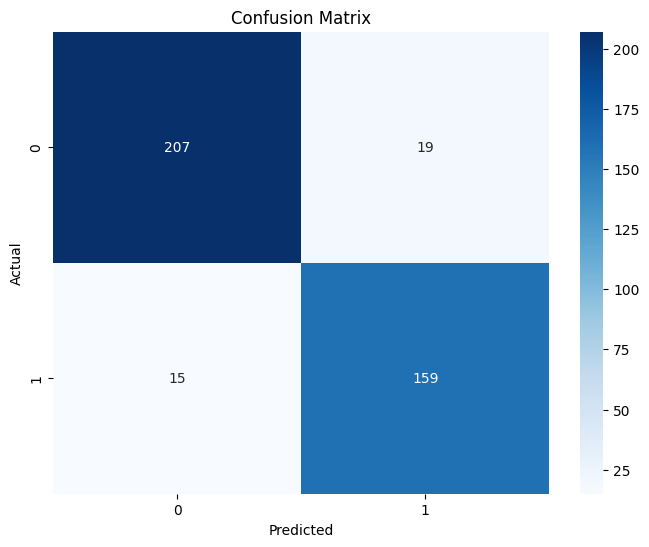

Accuracy: 0.915
Precision: 0.9153917400546615
Recall: 0.915
F1 Score: 0.9151034902597402
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       226
           1       0.89      0.91      0.90       174

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

xgb_classifier = XGBClassifier(random_state=110)

# Train the XGBoost model
xgb_classifier.fit(X_train, Y_train)

# Predit on the test set
Y_predict = xgb_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score (Y_test, Y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, Y_predict, average='weighted')
recall = recall_score(Y_test, Y_predict, average='weighted')
f1 = f1_score(Y_test, Y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(Y_test, Y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


# Loan prediction for the new client applications

In [17]:
check_data(df_predict)

,null_count,nan_count
Client_No,0,0
Monthly_Income,0,0
Years_Worked,0,0
Obligations,0,0


In [18]:
df_predict.duplicated(subset=['Client_No'],keep=False).value_counts(normalize= True) *100

False    100.0
dtype: float64

## Scaling the non- numeric data

In [19]:
# formatting the new application data
df_predict_clean = format(df_predict)

In [20]:
# Feature scaling and training data split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Select only the numerical columns
numerical_cols = ['Monthly_Income', 'Years_Worked']
df_predict_clean[numerical_cols] = scaler.fit_transform(df_predict_clean[numerical_cols])

In [21]:
df_predict_clean

,Client_No,Monthly_Income,Years_Worked,Obligations
0,4,-0.299191,1.167359,1
1,6,-1.245954,-1.329131,1
2,10,-0.389359,1.417008,0
3,12,-0.500335,-1.079482,1
4,22,0.179393,0.917710,1
...,...,...,...,...
995,2992,-0.628651,0.917710,0
996,2994,-0.115387,-0.330535,0
997,2998,-2.126825,0.668061,1
998,2999,1.635951,0.917710,0


## Applying Logistic regression on new application data

In [58]:
df_predict_clean.head()

,Client_No,Monthly_Income,Years_Worked,Obligations
0,4,-0.299191,1.167359,1
1,6,-1.245954,-1.329131,1
2,10,-0.389359,1.417008,0
3,12,-0.500335,-1.079482,1
4,22,0.179393,0.917710,1


In [75]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [53]:
new_app_LR = logistic_reg.predict(df_predict_clean[['Monthly_Income','Years_Worked', 'Obligations']])

In [52]:
logistic_reg.classes_

array([0, 1])

In [54]:
prob_yes= logistic_reg.predict_proba(df_predict_clean[['Monthly_Income','Years_Worked','Obligations']])[:,1]

In [55]:
df_new_app_LR = pd.concat([df_predict, pd.DataFrame(new_app_LR, columns=['Got_Approval']), pd.DataFrame(prob_yes, columns=['Probability_of_Yes'])], axis=1)
df_new_app_LR_prob = pd.concat([df_predict_clean, pd.DataFrame(new_app_LR, columns=['Got_Approval'])], axis=1)

In [56]:
df_new_app_LR['Got_Approval'] = df_new_app_LR['Got_Approval'].map({1:'YES', 0:'NO'})

## Probablity of approval for Client_No 200

In [59]:
df_new_app_LR.loc[df_new_app_LR['Client_No']==200]

,Client_No,Monthly_Income,Years_Worked,Obligations,Got_Approval,Probability_of_Yes
63,200,944.699782,14.859314,NO,NO,0.032195


**Probablity of client_id 200 that his/her loan will be approved is 3.22% **

## 500 application that deserve the approval

In [83]:
pd.options.display.float_format = '{:20,.4f}'.format

In [87]:
df_500_new_app = df_new_app_LR.sort_values(by='Probability_of_Yes', ascending= False)
df_500_new_app.head(500)

,Client_No,Monthly_Income,Years_Worked,Obligations,Got_Approval,Probability_of_Yes
413,1228,"2,152.0731",6.0707,NO,YES,1.0000
713,2156,"2,053.9533",9.8910,NO,YES,1.0000
729,2219,"2,073.9987",14.3182,YES,YES,1.0000
108,327,"2,028.7587",2.1787,NO,YES,1.0000
415,1232,"2,071.7502",1.6472,YES,YES,1.0000
...,...,...,...,...,...,...
233,703,"1,228.6947",13.9409,YES,NO,0.4221
819,2493,"1,226.6237",13.6607,YES,NO,0.4124
842,2547,"1,319.9092",2.3098,YES,NO,0.4112
430,1315,"1,121.1682",11.8750,NO,NO,0.4101
